In [ ]:
class A:
  def test(self):
    print('a')
class B(A):
  def test(self):
    print('b')
class C(A):
  def test(self):
    print('c')
class D(B, C):
  def test2(self):
    print('d')
o = D()
o.test()

b


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Modules

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 31.0 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
import re
from livelossplot.inputs.keras import PlotLossesCallback
from keras.applications.vgg16 import VGG16, preprocess_input
from tqdm import tqdm
import cv2
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

# DataLoader

In [ ]:
# Training set

X = np.load('/content/drive/MyDrive/Clickbait/Image_Dataset/img.npy')
Y = np.load('/content/drive/MyDrive/Clickbait/Image_Dataset/truth.npy')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=12345)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=12345)
del X
del Y

# Simple CNN 

In [ ]:
batch_size = 128

In [ ]:
# Building the 2-layer CNN
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(126, 126, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='LeakyReLU'),
    Dropout(0.2),

    Flatten(),

    Dense(64, activation='LeakyReLU'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')])

In [ ]:
# Setting up the optimizer and loss function
cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cnn.fit(X_train, y_train,
          batch_size=batch_size,
          epochs= 50,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/50
170/170 [==============================] - 25s 90ms/step - loss: 0.5719 - accuracy: 0.7768 - val_loss: 0.5703 - val_accuracy: 0.7694
Epoch 2/50
170/170 [==============================] - 14s 80ms/step - loss: 0.5100 - accuracy: 0.7853 - val_loss: 0.5400 - val_accuracy: 0.7694
Epoch 3/50
170/170 [==============================] - 14s 80ms/step - loss: 0.4991 - accuracy: 0.7854 - val_loss: 0.5833 - val_accuracy: 0.7698
Epoch 4/50
170/170 [==============================] - 14s 80ms/step - loss: 0.4860 - accuracy: 0.7848 - val_loss: 0.5443 - val_accuracy: 0.7693
Epoch 5/50
170/170 [==============================] - 14s 80ms/step - loss: 0.4636 - accuracy: 0.7921 - val_loss: 0.5146 - val_accuracy: 0.7707
Epoch 6/50
170/170 [==============================] - 14s 82ms/step - loss: 0.4359 - accuracy: 0.8039 - val_loss: 0.5264 - val_accuracy: 0.7762
Epoch 7/50
170/170 [==============================] - 14s 80ms/step - loss: 0.3923 - accuracy: 0.8252 - val_loss: 0.5275 - val_accuracy:

In [ ]:
cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
Y_pred = cnn2.predict(X_test)

(931, 126, 126, 1)

In [ ]:
y = []
for i in Y_pred:
  if i > 0.5:
    y.append(1)
  else:
    y.append(0)

In [ ]:
# Metrics of the model
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       729
           1       0.73      0.53      0.62       202

    accuracy                           0.86       931
   macro avg       0.80      0.74      0.76       931
weighted avg       0.85      0.86      0.85       931



In [ ]:
cnn2.save('/content/drive/MyDrive/Clickbait/Image_Models/CNN')

# VGG Dataloader

In [ ]:
# Training set

X_train = np.load('/content/drive/MyDrive/Clickbait/Image_Dataset/img_3channels_train.npy')
y_train = np.load('/content/drive/MyDrive/Clickbait/Image_Dataset/truth_3channels_train.npy')

In [ ]:
X = np.load('/content/drive/MyDrive/Clickbait/Image_Dataset/img_3channels_test.npy')
Y = np.load('/content/drive/MyDrive/Clickbait/Image_Dataset/truth_3channels_test.npy')

In [ ]:
X_train.shape

(25000, 64, 64, 3)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X, Y, test_size=0.7, random_state=12345)
del X
del Y

# VGG Net

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='sigmoid')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
input_shape = (64, 64, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=1
n_epochs = 100
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
y_train = np.reshape(y_train, (25000, 1))
y_val = np.reshape(y_val, (y_val.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [ ]:
plot_loss_1 = PlotLossesCallback()


# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

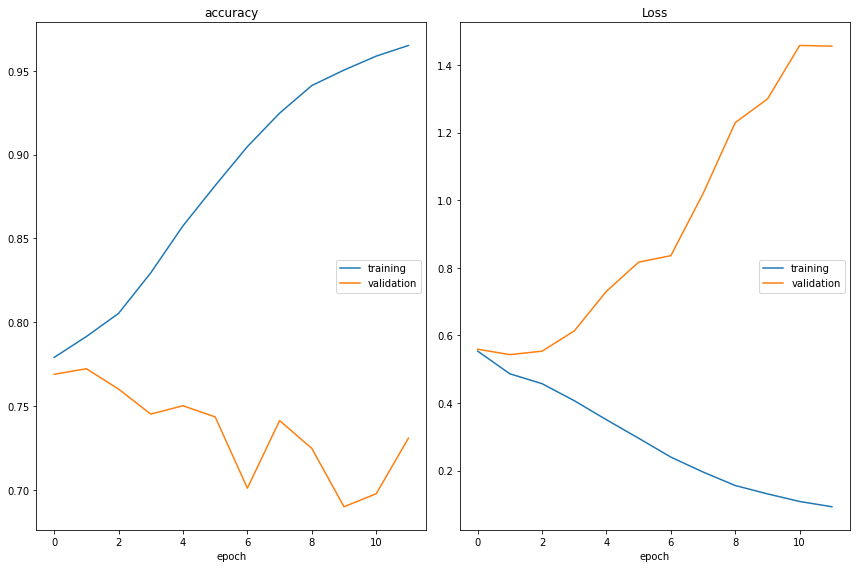

accuracy
	training         	 (min:    0.779, max:    0.965, cur:    0.965)
	validation       	 (min:    0.690, max:    0.772, cur:    0.731)
Loss
	training         	 (min:    0.093, max:    0.553, cur:    0.093)
	validation       	 (min:    0.543, max:    1.458, cur:    1.455)
196/196 [==============================] - 12s 62ms/step - loss: 0.0931 - accuracy: 0.9652 - val_loss: 1.4555 - val_accuracy: 0.7308


In [ ]:
vgg_history = vgg_model.fit(X_train, y_train, batch_size=128, epochs=n_epochs, validation_data = (X_val, y_val), callbacks=[early_stop, plot_loss_1])

In [ ]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
Y_pred = vgg_model.predict(X_test)
y = []
for i in Y_pred:
  if i > 0.5:
    y.append(1)
  else:
    y.append(0)

132/132 [==============================] - 3s 21ms/step


In [ ]:
# Metrics of the VGG Network
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3210
           1       0.69      0.02      0.03      1013

    accuracy                           0.76      4223
   macro avg       0.73      0.51      0.45      4223
weighted avg       0.75      0.76      0.67      4223



In [ ]:
vgg_model.save('/content/drive/MyDrive/Clickbait/Image_Models/VGG')